In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

import plotly.graph_objects as go
import seaborn as sns


olympics_data = "Resources/dropped_nulls_sorted.csv"

df = pd.read_csv(olympics_data)

In [3]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM
5,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Road Race, Individual",DNM
6,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,Cycling Men's 100 kilometres Team Time Trial,DNM
7,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Individual,DNM
8,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Team,DNM
9,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Fencing,"Fencing Men's epee, Team",DNM


In [4]:
# make a dataframe including Age for summer and winter distribution

new_df = df[["Age", "Sport", "Season"]]

new_df

,Age,Sport,Season
0,28.0,Gymnastics,Summer
1,41.0,Shooting,Summer
2,20.0,Cycling,Summer
3,23.0,Wrestling,Summer
4,31.0,Wrestling,Summer
...,...,...,...
196079,24.0,Synchronized Swimming,Summer
196080,28.0,Judo,Summer
196081,25.0,Cycling,Summer
196082,29.0,Water Polo,Summer


In [5]:
# Filter data for Summer Olympics
summer_df = df[df['Season'] == 'Summer']

# Calculate age distribution for Summer Olympics
summer_age_distribution = summer_df['Age'].value_counts().sort_index()

# Filter data for Winter Olympics
winter_df = df[df['Season'] == 'Winter']

# Calculate age distribution for Winter Olympics
winter_age_distribution = winter_df['Age'].value_counts().sort_index()

print("Age Distribution for Summer Olympics:")
print(summer_age_distribution)
print("\nAge Distribution for Winter Olympics:")
print(winter_age_distribution)

Age Distribution for Summer Olympics:
Age
11.0       4
12.0      23
13.0     146
14.0     679
15.0    1735
        ... 
67.0       2
68.0       1
69.0       2
70.0       2
71.0       1
Name: count, Length: 61, dtype: int64

Age Distribution for Winter Olympics:
Age
11.0       1
12.0       2
13.0      11
14.0      35
15.0     120
16.0     315
17.0     587
18.0    1036
19.0    1556
20.0    2168
21.0    2846
22.0    3204
23.0    3460
24.0    3649
25.0    3239
26.0    2906
27.0    2733
28.0    2531
29.0    1973
30.0    1549
31.0    1222
32.0    1025
33.0     741
34.0     475
35.0     406
36.0     274
37.0     182
38.0     135
39.0     103
40.0      64
41.0      43
42.0      17
43.0      23
44.0      11
45.0      12
46.0       8
47.0       5
48.0       4
49.0       3
50.0       2
51.0       3
52.0       1
53.0       3
55.0       1
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


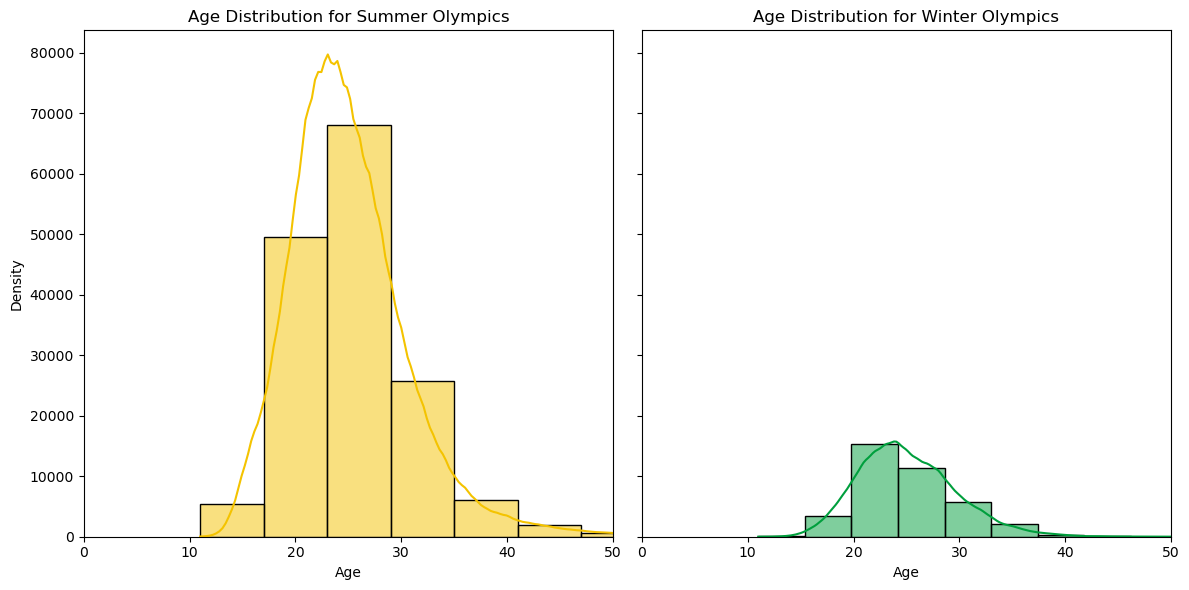

In [6]:
# Got help from Xpert to create this

# Create subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the histogram for Summer Olympics
sns.histplot(summer_df['Age'], bins=10, kde=True, color='#F4C300', edgecolor='black', ax=ax1)
ax1.set_title('Age Distribution for Summer Olympics')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_xlim(0, 50)  # Set the same range for both histograms

# Plot the histogram for Winter Olympics
sns.histplot(winter_df['Age'], bins=10, kde=True, color='#009F3D', edgecolor='black', ax=ax2)
ax2.set_title('Age Distribution for Winter Olympics')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.set_xlim(0, 50)  # Set the same range for both histograms

plt.tight_layout()
plt.show()

In [7]:
new_df.head()

,Age,Sport,Season
0,28.0,Gymnastics,Summer
1,41.0,Shooting,Summer
2,20.0,Cycling,Summer
3,23.0,Wrestling,Summer
4,31.0,Wrestling,Summer


In [12]:
average_age = new_df['Age'].mean()

average_age

25.052870198486364

In [35]:
# Creating average age by sport data frame

avg_age_by_sport = new_df.groupby('Sport')['Age'].mean().reset_index()


df_sorted = avg_age_by_sport.sort_values(by='Age')

df_sorted.head()


,Sport,Age
29,Rhythmic Gymnastics,18.808130
40,Swimming,20.621499
21,Gymnastics,21.571121
17,Figure Skating,22.189189
14,Diving,22.226550


In [36]:
# Highest average age

sport_highest_avg_age = df_sorted.loc[avg_age_by_sport['Age'].idxmax()]['Sport']
highest_avg_age = df_sorted['Age'].max()

In [37]:
highest_avg_age

34.23507720672966

In [38]:
sport_highest_avg_age

'Equestrianism'

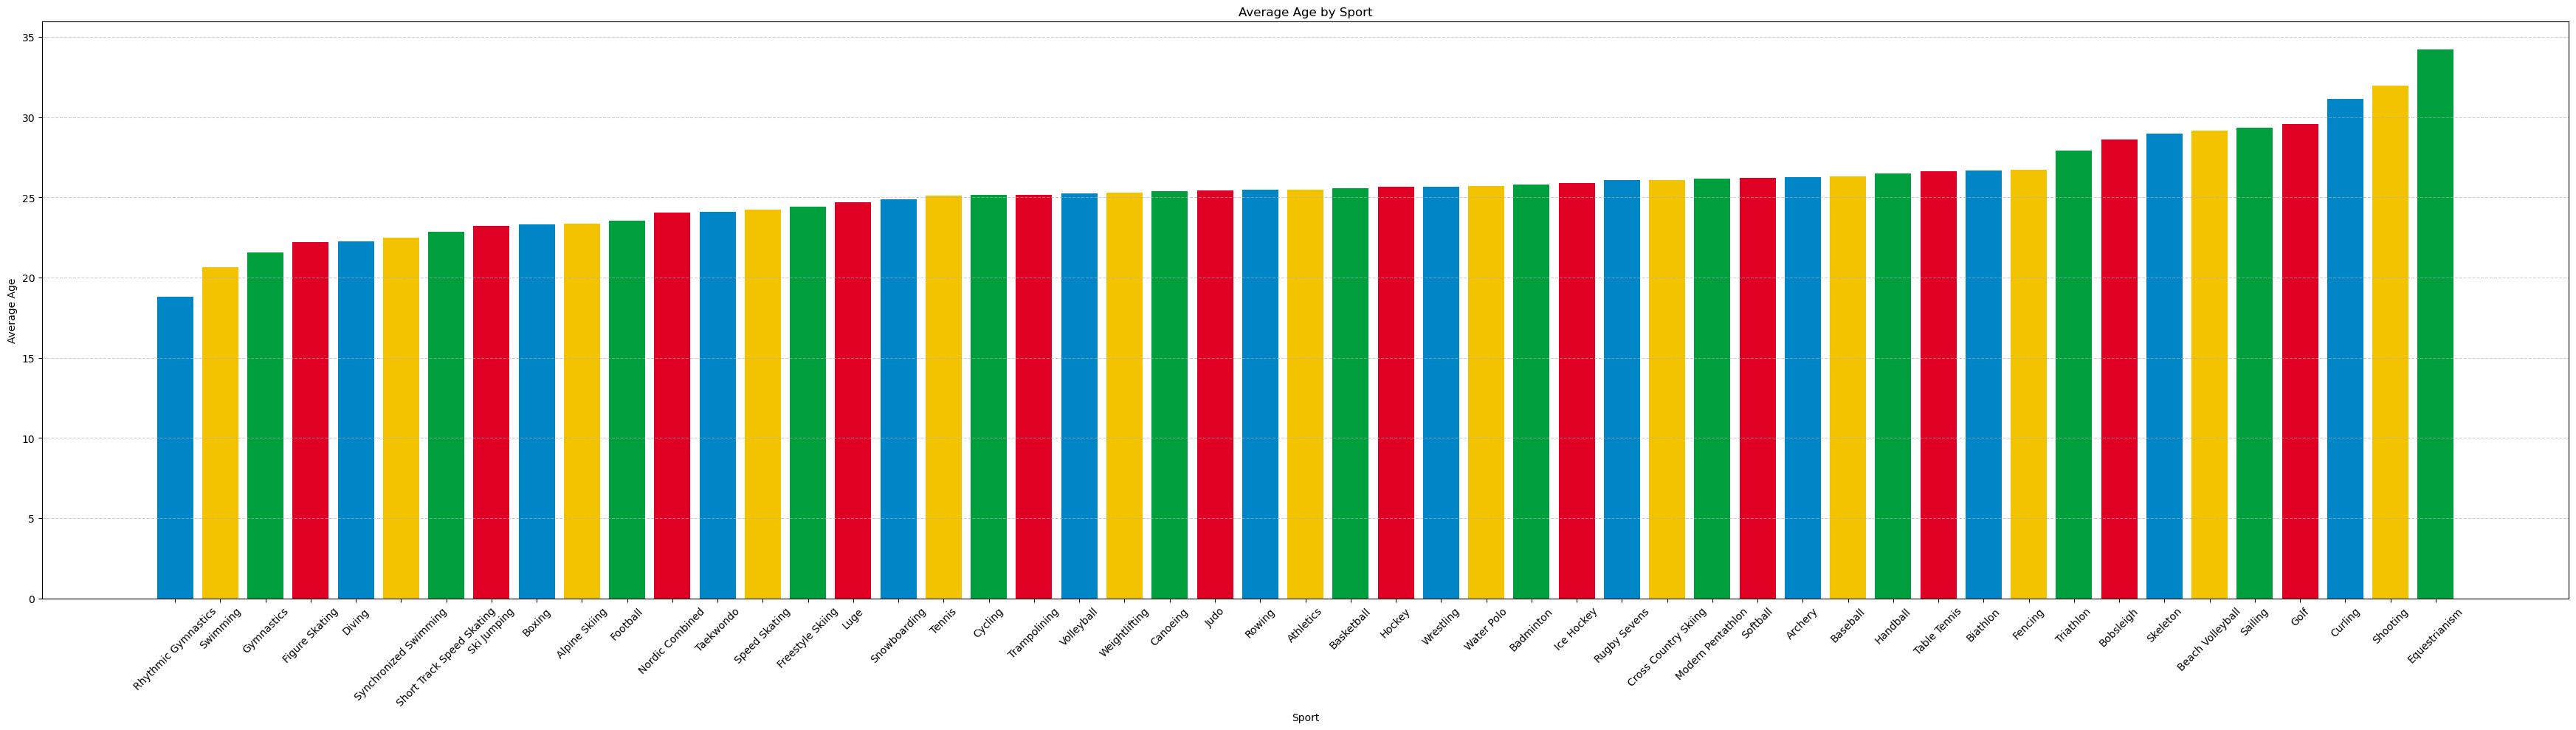

In [40]:
avg_age_by_sport_sorted = avg_age_by_sport.sort_values(by='Age')

colors = ["#0085C7", "#F4C300", "#009F3D", "#DF0024"]

plt.figure(figsize=(35, 10))
plt.bar(avg_age_by_sport_sorted['Sport'], avg_age_by_sport_sorted['Age'], color=colors)
plt.xlabel('Sport')
plt.ylabel('Average Age')
plt.title('Average Age by Sport')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()